<a href="https://colab.research.google.com/github/akash-agni/DeepLearning/blob/main/Autoencoder_For_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(f"Training Data Images : {len(x_train)}")
print(f"Testing Data Images : {len(x_test)}")

Training Data Images : 50000
Testing Data Images : 10000


In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

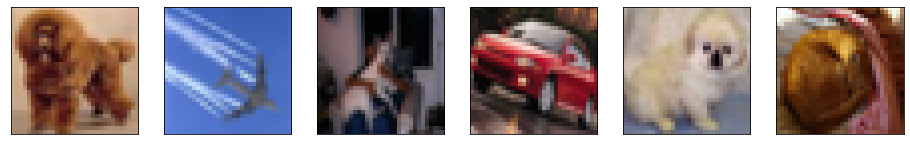

In [5]:
fig, ax = plt.subplots(figsize=(16,3), ncols=6)
for i in range(6):
  idx = np.random.randint(len(x_train))
  img = x_train[idx,:,:,:]
  ax[i].imshow(img)
  ax[i].get_xaxis().set_visible(False)
  ax[i].get_yaxis().set_visible(False)

In [6]:
def autoencoder(layers, input_shape, dr, reg):
  inputs = tf.keras.layers.Input(shape=input_shape)

  x = tf.keras.layers.Conv2D(32, (5,5), 1, 'same', kernel_regularizer=reg)(inputs)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)

  for f, l in layers:
    for _ in range(l):
      x = tf.keras.layers.Conv2D(f, (3,3), 1, 'same', kernel_regularizer=reg)(x)
      x = tf.keras.layers.BatchNormalization()(x)
      x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)
    x = tf.keras.layers.Dropout(dr)(x)
  

  for f, l in layers[::-1]:
    x = tf.keras.layers.UpSampling2D(2, data_format='channels_last')(x)
    for _ in range(l):
      x = tf.keras.layers.Conv2D(f, (3,3), 1, 'same', kernel_regularizer=reg)(x)
      x = tf.keras.layers.BatchNormalization()(x)
      x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Dropout(dr)(x)

  x = tf.keras.layers.UpSampling2D(2, data_format='channels_last')(x)
  outputs = tf.keras.layers.Conv2D(3, 2, 1, padding='same', activation='sigmoid')(x)

  model = tf.keras.Model(inputs, outputs)
  return model

In [7]:
en_len = [(32,2), (64,2)]
reg = tf.keras.regularizers.L2(0.001)
dr = 0.3
model = autoencoder(en_len, x_train.shape[1:], dr, reg)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128   

In [8]:
val_loss, loss, mse, val_mse = list(), list(), list(), list()

In [15]:
optim = tf.keras.optimizers.Adagrad(learning_rate=0.001)
losses = tf.keras.losses.binary_crossentropy
metrics = 'mse'
model.compile(optim, losses, metrics)

In [16]:
history = model.fit(x=x_train, y=x_train, batch_size=512, epochs=10, validation_split=0.10)
val_loss = val_loss + history.history['val_loss']
val_mse = val_mse + history.history['val_mse']
loss = loss +  history.history['loss']
mse = mse + history.history['mse']

Epoch 1/10
88/88 [==============================] - 7s 65ms/step - loss: 0.5853 - mse: 0.0136 - val_loss: 0.5793 - val_mse: 0.0105
Epoch 2/10
88/88 [==============================] - 5s 61ms/step - loss: 0.5855 - mse: 0.0137 - val_loss: 0.5790 - val_mse: 0.0104
Epoch 3/10
88/88 [==============================] - 5s 61ms/step - loss: 0.5845 - mse: 0.0137 - val_loss: 0.5789 - val_mse: 0.0104
Epoch 4/10
88/88 [==============================] - 5s 61ms/step - loss: 0.5852 - mse: 0.0136 - val_loss: 0.5788 - val_mse: 0.0104
Epoch 5/10
88/88 [==============================] - 5s 61ms/step - loss: 0.5854 - mse: 0.0136 - val_loss: 0.5788 - val_mse: 0.0104
Epoch 6/10
88/88 [==============================] - 5s 61ms/step - loss: 0.5850 - mse: 0.0136 - val_loss: 0.5788 - val_mse: 0.0104
Epoch 7/10
88/88 [==============================] - 5s 61ms/step - loss: 0.5851 - mse: 0.0136 - val_loss: 0.5788 - val_mse: 0.0104
Epoch 8/10
88/88 [==============================] - 5s 61ms/step - loss: 0.5846 - m

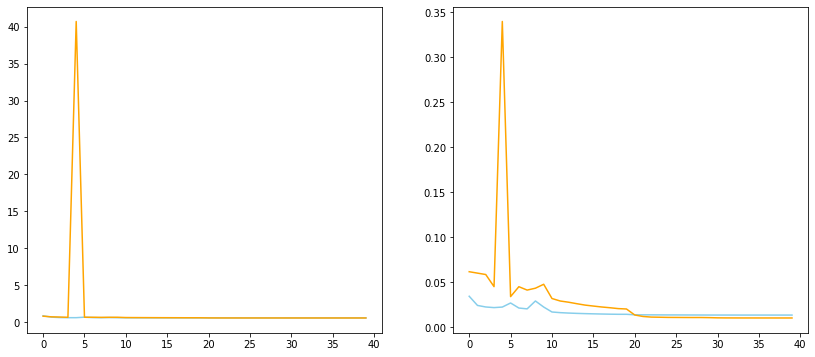

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))
x = list(range(len(val_loss)))

sns.lineplot(x=x, y=loss, ax=ax[0], color='skyblue')
sns.lineplot(x=x, y=val_loss, ax=ax[0], color='orange')

sns.lineplot(x=x, y=mse, ax=ax[1], color='skyblue')
sns.lineplot(x=x, y=val_mse, ax=ax[1], color='orange')

In [18]:
predictions = model.predict(x_test)

In [19]:
label_names = {0: 'airplane',
               1: 'automobile',
               2: 'bird',
               3: 'cat',
               4: 'deer',
               5: 'dog',
               6: 'frog',
               7: 'horse',
               8: 'ship',
               9: 'truck'}

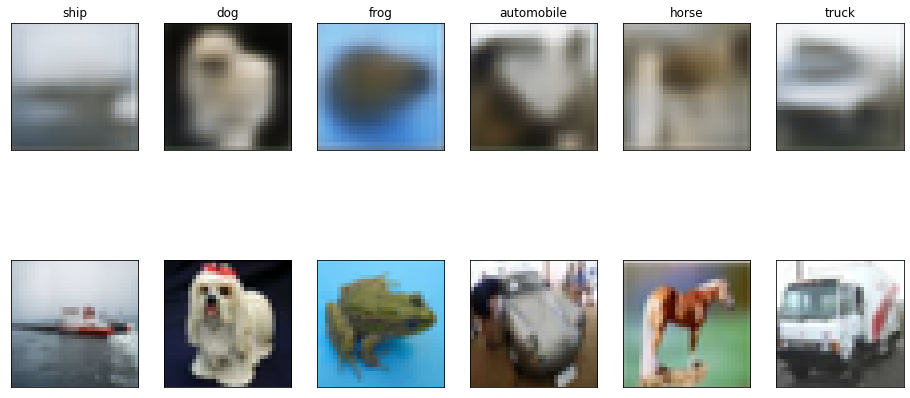

In [21]:
fig, ax = plt.subplots(figsize=(16,8), nrows=2,ncols=6)
for i in range(6):
  idx = np.random.randint(len(predictions))
  pred_img = predictions[idx,:,:,:]
  label = y_test[idx][0]
  ax[0][i].imshow(pred_img)
  ax[0][i].set_title(label_names[label])
  ax[0][i].get_xaxis().set_visible(False)
  ax[0][i].get_yaxis().set_visible(False)

  orig_img = x_test[idx,:,:,:]
  ax[1][i].imshow(orig_img)
  ax[1][i].get_xaxis().set_visible(False)
  ax[1][i].get_yaxis().set_visible(False)